In [1]:
# Machine Learning - Unsupervised Learning

# No understanding of data like which is the dependent variable or types of independent variables and also do not know 
# which algorithms to implement.

# Clustering Algorithms are used and these algorithms cluster or group data based on similarities.

# Clustering Alogorithms are distance based algorithms like KMeans and Hierarchical/Agglomerative Clustering and 
# also density based like DBSCAN

# Distance Based Clustering ALgotithms - KMeans

# Kmeans is an Iterative Algorithms that divides unlabelled data into different clusters in such a way that each observation
# belongs to only one group or cluster that has similar properties.

# It is a centroid based algorithm wherein each cluster will have its own centroid or mid point from which distances 
# calculated for clustering.

# The objective of this algorithm is to minimize sum of squares of distance between observations and corresponding centroids.

# In KMeans value of K is an integer which represetns number of clusters and it is decided using grid search or 
# through elbow plot.

# Elbow plot y-axis is Error or Within Cluster Sum Square or WCSS and X-axis is number of clusters.

# Scaling must be done as it is a distance based algoithm

# Silhouette Score is a metric to evaluate the performance of clustering algorithm. It uses compactness of 
# individual clusters(intra cluster distance) and separation amongst clusters (inter cluster distance) to measure an overall 
# representative score of how well our clustering algorithm has performed.

# The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and
# poorly matched to neighboring clusters.

# If most objects have a high values, then the clustering configuration is appropriate. If many points have a low or negative 
# vlaue, then the clustering condfiugration may have too many or too few clusters.

# Closer to 1 means - Cluster formation is clear
# Closer to 0 & negative - Wrong Cluster formation and overlapping.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mall = pd.read_csv('Mall_Customers.csv')

In [4]:
mall.shape

(200, 5)

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
mall.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [8]:
mall

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
mall = mall.drop('CustomerID', axis = 1)

In [10]:
mall = pd.get_dummies(mall, columns =['Genre'])

In [11]:
mall

,Age,Annual_Income_(k$),Spending_Score,Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [12]:
from sklearn.cluster import KMeans

In [13]:
wccs_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall)
    wccs_list.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

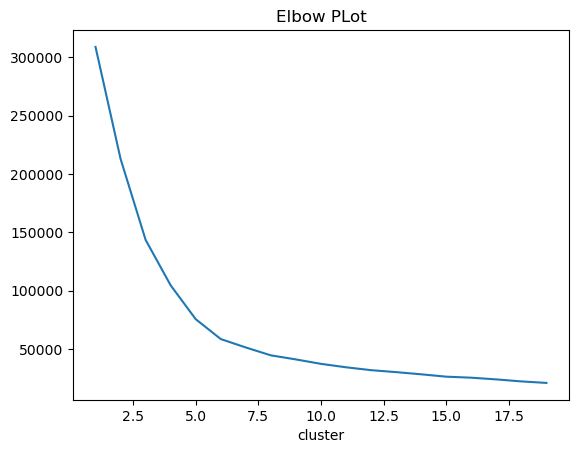

In [14]:
plt.plot(range(1,20),wccs_list)
plt.title("Elbow PLot")
plt.xlabel("cluster")
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
clustermodel = KMeans(n_clusters=6)

In [17]:
clustermodel = clustermodel.fit(mall)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
silhouette_score(mall,clustermodel.labels_)

0.4517762870734356

In [19]:
cluster5model = KMeans(n_clusters=5)

In [20]:
cluster5model = cluster5model.fit(mall)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
silhouette_score(mall,cluster5model.labels_)

0.44002319863526246

In [22]:
cluster8model= KMeans(n_clusters=8)

In [23]:
cluster8model = cluster8model.fit(mall)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
silhouette_score(mall,cluster8model.labels_)

0.42722300208029473

In [25]:
clustermodel.cluster_centers_

array([[27.        , 56.65789474, 49.13157895,  0.65789474,  0.34210526],
       [56.34090909, 53.70454545, 49.38636364,  0.56818182,  0.43181818],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [41.68571429, 88.22857143, 17.28571429,  0.42857143,  0.57142857],
       [44.31818182, 25.77272727, 20.27272727,  0.59090909,  0.40909091]])

In [26]:
mall.columns

Index(['Age', 'Annual_Income_(k$)', 'Spending_Score', 'Genre_Female',
       'Genre_Male'],
      dtype='object')

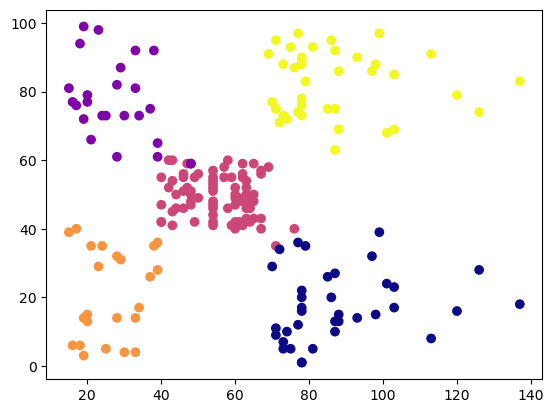

In [27]:
plt.scatter(mall['Annual_Income_(k$)'], mall['Spending_Score'], c = cluster5model.labels_,cmap="plasma")

In [28]:
mall.corr()

,Age,Annual_Income_(k$),Spending_Score,Genre_Female,Genre_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual_Income_(k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending_Score,-0.327227,0.009903,1.000000,0.058109,-0.058109
Genre_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Genre_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


<Axes: >

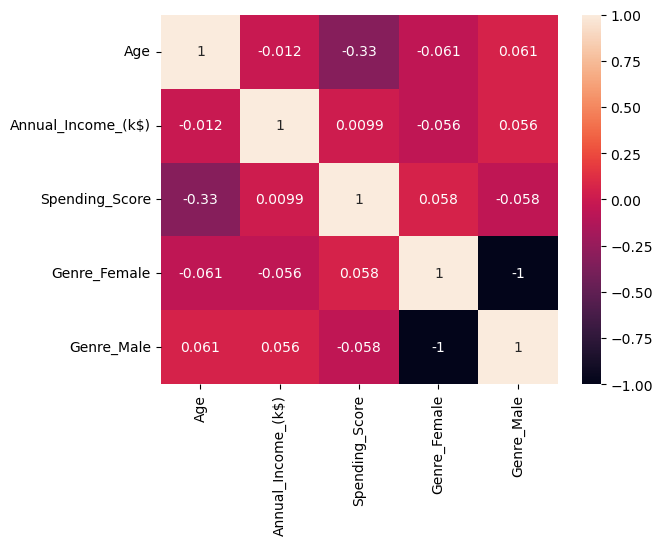

In [29]:
sns.heatmap(mall.corr(),annot=True)

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
h_clust = AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='ward')

In [33]:
h_clust_model = h_clust.fit(mall)

In [34]:
silhouette_score(mall,h_clust_model.labels_)

0.43976347350045475

In [35]:
import scipy.cluster.hierarchy as sch

In [37]:
from sklearn.metrics.pairwise import euclidean_distances

In [38]:
X_euclid_dist = euclidean_distances(mall)

C:\Users\Hp\AppData\Local\Temp\ipykernel_4448\2259328351.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram = sch.dendrogram(sch.linkage(X_euclid_dist, method='ward'))


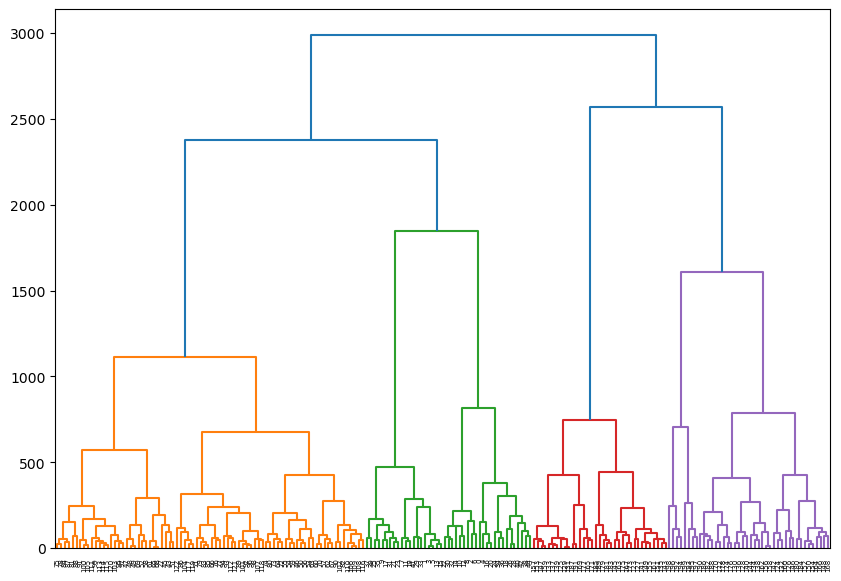

In [39]:
plt.figure(figsize=(10,7))
dendogram = sch.dendrogram(sch.linkage(X_euclid_dist, method='ward'))

In [40]:
# Clustering - DBSCAN which is a density based clustering method that cluster data points by sperating between high density and
# low density regions.

# DBSCAN does not require the specifications of no.of clusters.
# DBSCAN by default uses Euclidean distance for distance calculations and is very good in outlier detection or Anomaly detection

# DBSCAN requires 2 parameters 
# 1) Epsilon(eps) - least distance requried for 2 points to be termed as neighbors 
# 2) MinPoints    - minumum number of points needed to contruct a cluster.

# A cluster is recongnize only if the number of points is greater than or equal to MinPoints.

# 3 Types of data points
# 1) Core   - point from which 2 parameters are fully defined.
# 2) Border - any data point that is not core
# 3) Noise  - point with less than MinPoints.

# If the dataset has more than 2 variables then min sample per cluster, MinPoints = 2 x Number of variabels.

# To calculate Epsilon, Nearest Neighbors algorithm is used.

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
neighbors = NearestNeighbors()

In [43]:
nbrs = neighbors.fit(mall)

In [44]:
distances, indicies = nbrs.kneighbors(mall)

In [48]:
distances =  np.sort(distances[:,1])

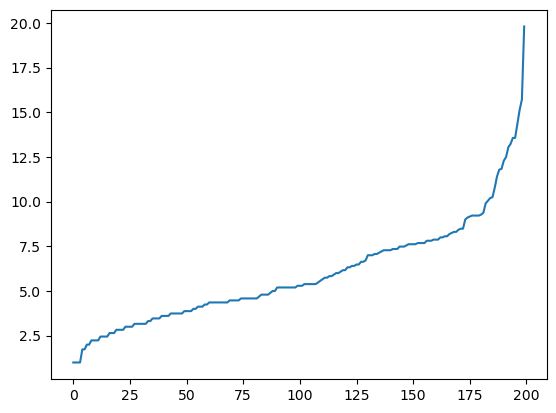

In [50]:
plt.plot(distances)

# The optimal value for epsilon will be found at the point of maximum curvature.

# Epsilon = 9
# MinPoints = 2 * 5 = 10

In [52]:
from sklearn.cluster import DBSCAN

In [77]:
dbs = DBSCAN(eps = 14, min_samples=10).fit(mall)

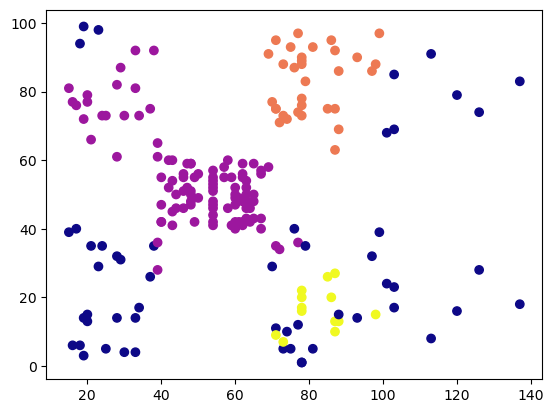

In [78]:
plt.scatter(mall['Annual_Income_(k$)'], mall['Spending_Score'], c = dbs.labels_,cmap="plasma")